## l - Détection de fraude en assurance avec les données Tabulaire

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importation des données
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

csv_path = '/content/drive/MyDrive/carclaims.csv'

In [ ]:
df = pd.read_csv(csv_path)
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [ ]:
# Taille du dataset
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

Nombre de lignes : 15420
Nombre de colonnes : 33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [ ]:
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
print(df['FraudFound'].value_counts())

FraudFound
No     14497
Yes      923
Name: count, dtype: int64


In [ ]:
percent = (len(df[df['FraudFound']=='Yes']) / df.shape[0]) * 100
print(f"La fraude détectée est {percent:.2f} % des données")

La fraude détectée est 5.99 % des données


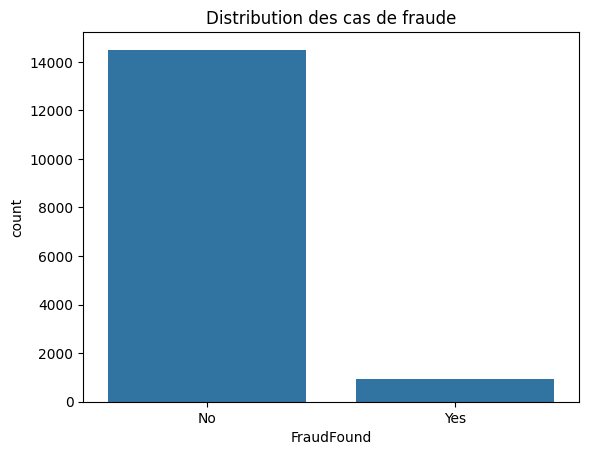

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de la variable cible "FraudFound"
sns.countplot(data=df, x='FraudFound')
plt.title("Distribution des cas de fraude")
plt.show()


<Axes: ylabel='Deductible'>

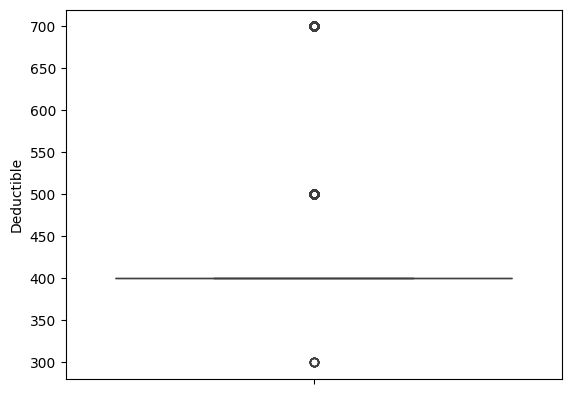

In [ ]:
sns.boxplot(y='Deductible', data=df)

<Axes: xlabel='Deductible', ylabel='Density'>

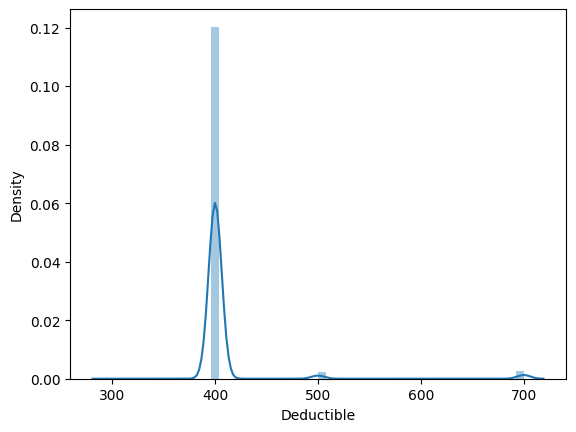

In [ ]:
sns.distplot(df['Deductible'])

**Visiblement la plus part des assurés ont souscrit pour un montant de franchise égale à 400$ **

### Visualisation entre variable cible et les autres variables catégorieles

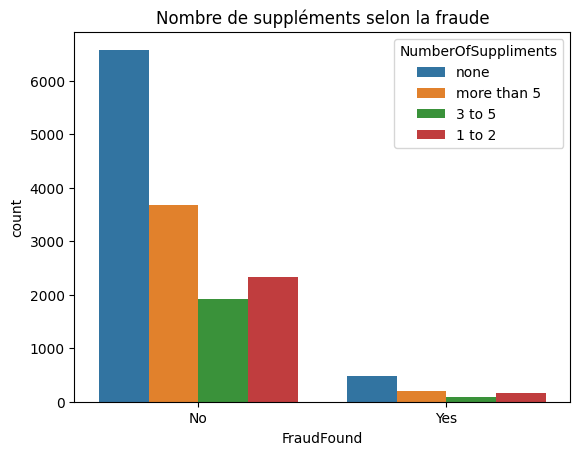

In [ ]:
# Visualisation du nombre de supplement par rapport à la fraude
sns.countplot(x='FraudFound', hue='NumberOfSuppliments', data=df)
plt.title("Nombre de suppléments selon la fraude")
plt.show()

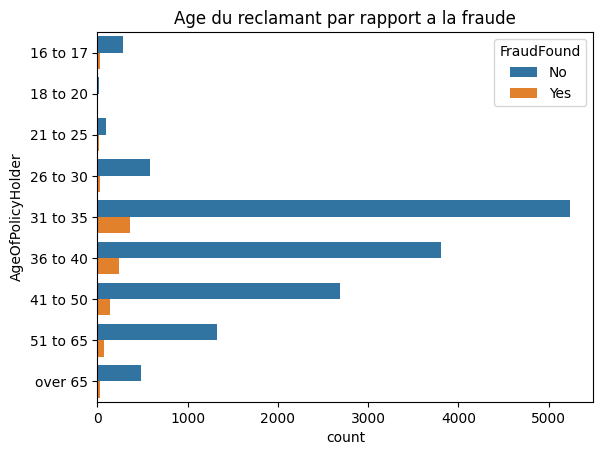

In [ ]:
#visualisation de la durée de la police par rapport à la fraude

age_order = [
    "16 to 17", "18 to 20", "21 to 25", "26 to 30",
    "31 to 35", "36 to 40", "41 to 50", "51 to 65", "over 65"
]

sns.countplot(y="AgeOfPolicyHolder", hue= "FraudFound", data=df, order= age_order)
plt.title('Age du reclamant par rapport a la fraude' )
plt.show()

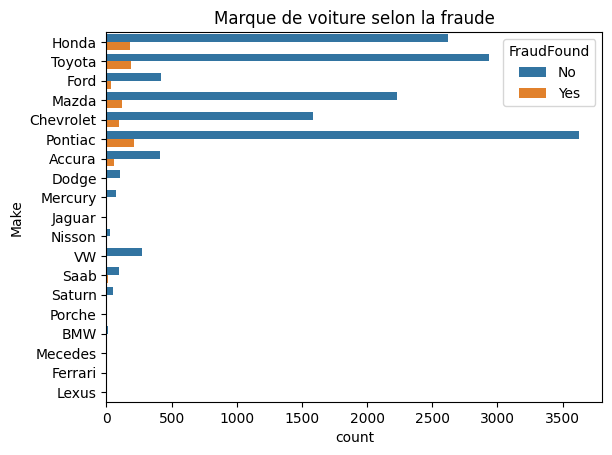

In [ ]:
sns.countplot(y='Make', hue= 'FraudFound', data= df)
plt.title('Marque de voiture selon la fraude')
plt.show()

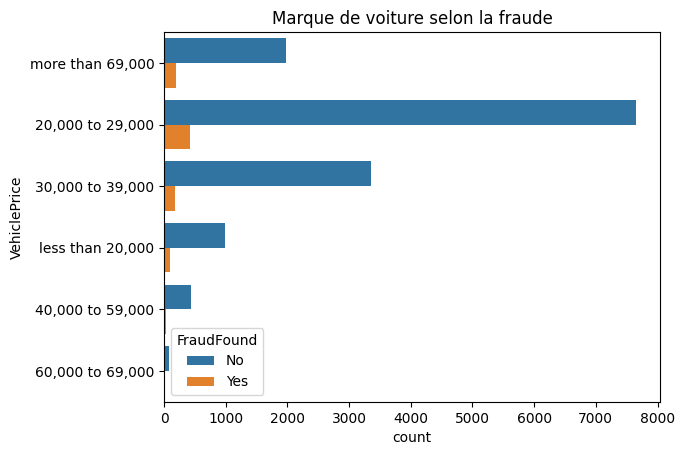

In [ ]:
sns.countplot(y='VehiclePrice', hue= 'FraudFound', data= df)
plt.title('Marque de voiture selon la fraude')
plt.show()

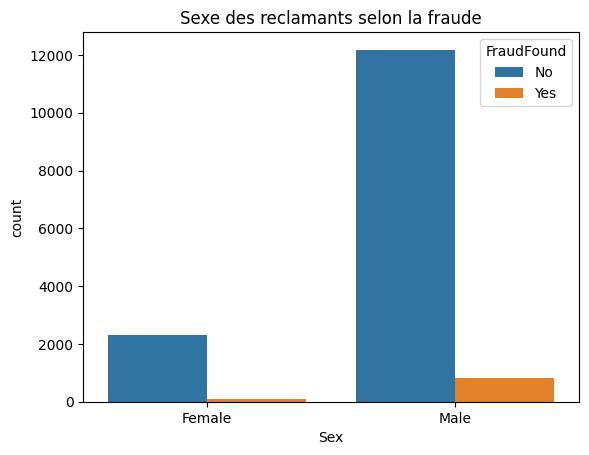

In [ ]:
sns.countplot(x='Sex', hue= 'FraudFound', data= df)
plt.title('Sexe des reclamants selon la fraude')
plt.show()

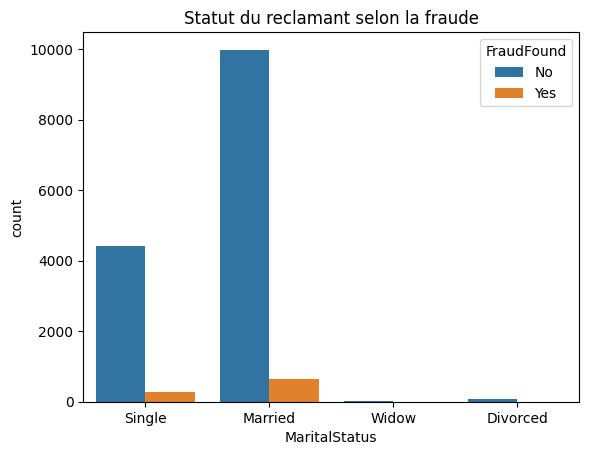

In [ ]:
sns.countplot(x='MaritalStatus', hue= 'FraudFound', data= df)
plt.title('Statut du reclamant selon la fraude')
plt.show()

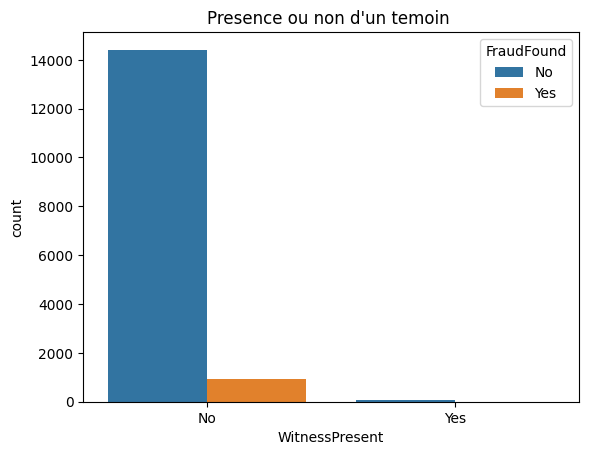

In [ ]:
sns.countplot(x='WitnessPresent', hue= 'FraudFound', data=df)
plt.title("Presence ou non d'un temoin ")
plt.show()

###  Préparation de données

**Suppression de quelques variables redondantes :**
- "PolicyNumber" - ID de police
- "AgeOfPolicyHolder" - redondant avec "Age"
- "PolicyType" - redondant avec "BasePolicy"

In [ ]:
df[['PolicyNumber']]

,PolicyNumber
0,1
1,2
2,3
3,4
4,5
...,...
15415,15416
15416,15417
15417,15418
15418,15419


In [ ]:
#même donées
df[['AgeOfPolicyHolder', 'Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21
1,31 to 35,34
2,41 to 50,47
3,51 to 65,65
4,31 to 35,27
...,...,...
15415,31 to 35,35
15416,31 to 35,30
15417,26 to 30,24
15418,31 to 35,34


In [ ]:
#Encore même donées
df[['BasePolicy', 'PolicyType']]

In [ ]:
df[['VehicleCategory']]

,VehicleCategory
0,Sport
1,Sport
2,Sport
3,Sport
4,Sport
...,...
15415,Sedan
15416,Sport
15417,Sedan
15418,Sedan


In [ ]:
columns_ToDrop= ['PolicyNumber', 'PolicyType', 'AgeOfPolicyHolder']

In [ ]:
df_new= df.drop(columns_ToDrop, axis=1)

In [ ]:
#Faisons une copie de nos nouvelles données
df_drop = df_new.copy()

In [ ]:
df_drop.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'RepNumber', 'Deductible', 'DriverRating', 'Days:Policy-Accident',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [ ]:
#encodage de la variable cible
df_drop['FraudFound'].replace({'Yes':1, 'No':0}, inplace= True)

In [ ]:
df_drop.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [ ]:
#Nous allons utiliser la fonction dummies pour transformer les variables qualitatives en type vecteur nombre

nouv_df=pd.get_dummies(df_drop[df_drop.columns[:-1]])

In [ ]:
nouv_df.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,12,300,1,1994,False,False,True,...,False,False,False,False,True,False,False,False,False,True
1,3,4,34,15,400,4,1994,False,False,False,...,True,False,True,False,False,False,False,False,True,False
2,5,2,47,7,400,3,1994,False,False,False,...,True,False,True,False,False,False,False,False,True,False
3,2,1,65,4,400,2,1994,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,5,2,27,3,400,1,1994,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
#Nous allons compléter le nouveau dataframe avec la variable cible
nouv_df['Fraud'] = df_drop['FraudFound']

In [ ]:
nouv_df.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Fraud
0,5,1,21,12,300,1,1994,False,False,True,...,False,False,False,True,False,False,False,False,True,0
1,3,4,34,15,400,4,1994,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,5,2,47,7,400,3,1994,False,False,False,...,False,True,False,False,False,False,False,True,False,0
3,2,1,65,4,400,2,1994,False,False,False,...,False,True,False,False,False,False,False,False,True,0
4,5,2,27,3,400,1,1994,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [ ]:
nouv_df.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible',
       'DriverRating', 'Year', 'Month_Apr', 'Month_Aug', 'Month_Dec',
       ...
       'AddressChange-Claim_under 6 months', 'NumberOfCars_1 vehicle',
       'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8',
       'NumberOfCars_more than 8', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability', 'Fraud'],
      dtype='object', length=130)

In [ ]:
nouv_df['Month_Nov']

,Month_Nov
0,False
1,False
2,False
3,False
4,False
...,...
15415,True
15416,True
15417,True
15418,False


In [ ]:
#Separons nos données en données d'entrainement, de test et de validation
from sklearn.model_selection import train_test_split
seed=42
X=nouv_df.iloc[:,:-1]
y=nouv_df['Fraud']

#à cause du déséquilibre de classe dans nos données, nous allons appliquer la methode stratify sur y
#pour assurer la bonne distribution de notre variable cible

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [ ]:
#verifions que la repartion est identique dans toutes nos données
y.value_counts(normalize=True)

,proportion
Fraud,
0,0.940143
1,0.059857


In [ ]:
y_train.value_counts(normalize=True)

,proportion
Fraud,
0,0.940175
1,0.059825


In [ ]:
y_test.value_counts(normalize=True)

,proportion
Fraud,
0,0.940013
1,0.059987


**UpSample**

In [ ]:
#Methode de suréchantillonnage

from sklearn.utils import resample

X_sur=X_train
X_sur['Fraud']=y_train.values

# definissons les classes minoritaire et majoritaire

minority= X_sur[X_sur.Fraud == 1]
majority= X_sur[X_sur.Fraud == 0]

minority_upsampled = resample(minority, replace = True, n_samples= len(majority))

minority_upsampled

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Apr,Month_Aug,Month_Dec,...,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Fraud
3275,1,2,31,2,400,4,1994,False,False,False,...,False,True,False,False,False,False,False,True,False,1
8521,2,2,33,3,400,1,1995,False,False,True,...,False,True,False,False,False,False,False,False,True,1
5681,2,3,46,13,400,2,1994,False,True,False,...,False,True,False,False,False,False,False,True,False,1
2423,5,3,32,15,400,4,1994,False,False,False,...,False,True,False,False,False,False,True,False,False,1
5232,4,4,36,5,400,2,1994,False,False,False,...,False,True,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9203,2,3,35,6,400,2,1995,False,False,False,...,False,True,False,False,False,False,False,True,False,1
844,4,2,0,15,400,3,1994,False,False,False,...,False,True,False,False,False,False,True,False,False,1
8854,4,1,38,5,400,4,1995,False,False,True,...,False,True,False,False,False,False,True,False,False,1
12864,2,4,31,7,400,1,1996,False,False,False,...,False,True,False,False,False,False,False,True,False,1


In [ ]:
#verifions si les deux classes sont a la meme taille
majority.shape

(11598, 130)

In [ ]:
#on met les deux dataframe ensemble

upsampled = pd.concat([majority, minority_upsampled])

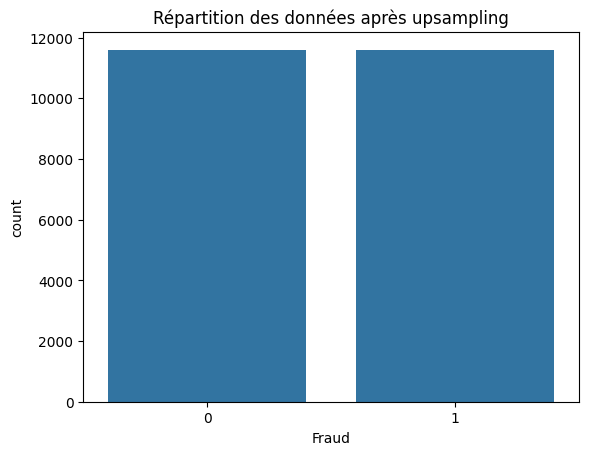

In [ ]:
# visualisons avec la repartition

sns.countplot(x='Fraud' , data=upsampled)
plt.title("Répartition des données après upsampling")
plt.show()

In [ ]:
#redéfinition des données d'entrainement

X_train_up= upsampled.iloc[:,:-1]
y_train_up = upsampled['Fraud']


**UnderSample**

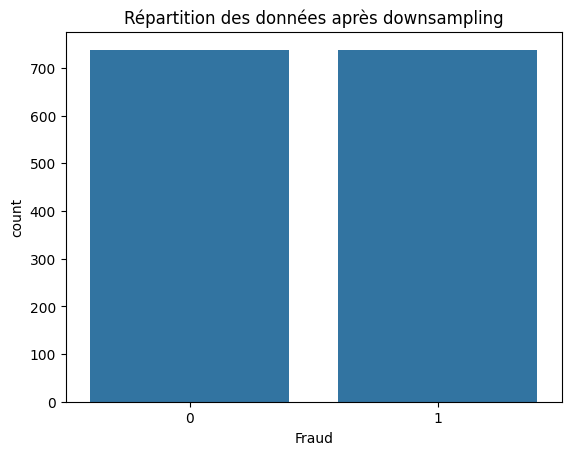

In [ ]:
majority_undersampled = resample(majority, replace = False, n_samples= len(minority))
undersampled = pd.concat([minority, majority_undersampled])
sns.countplot(x=undersampled['Fraud'])
plt.title("Répartition des données après downsampling")
plt.show()

In [ ]:
# definition des données d'entrainement du sous-échantillonnage

X_train_under= undersampled.iloc[:,:-1]
y_train_under = undersampled['Fraud']

## Modélisation

#### Random Forest

=== Forêt Aléatoire ===
Accuracy : 0.9406614785992218

Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.60      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.77      0.52      0.52      3084
weighted avg       0.92      0.94      0.91      3084


Matrice de confusion :
[[2895    4]
 [ 179    6]]

AUC-ROC : 0.8265310498494356


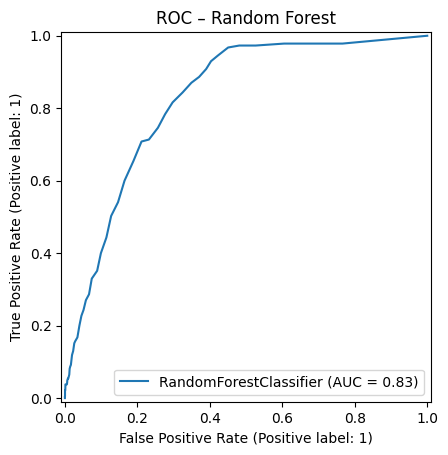

In [ ]:
# Modèle 1: Foret aléatoire avec upsample

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100,random_state= seed)

rf.fit(X_train_up, y_train_up)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Forêt Aléatoire ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))
print("\nAUC-ROC :", roc_auc_score(y_test, y_proba_rf))

# Courbe ROC
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC – Random Forest")
plt.show()

In [ ]:
# voyons les variables qui ont des valeurs importantes dans ce modèle
var_imp={"Variable":X_train_up.columns,
                         "Importance":rf.feature_importances_}
print(pd.DataFrame(var_imp).sort_values(by="Importance",ascending=False).head(50))

                             Variable  Importance
74                Fault_Policy Holder    0.068589
128              BasePolicy_Liability    0.057783
75                  Fault_Third Party    0.057219
2                                 Age    0.054294
3                           RepNumber    0.042988
77              VehicleCategory_Sport    0.033108
76              VehicleCategory_Sedan    0.027515
0                         WeekOfMonth    0.026537
1                  WeekOfMonthClaimed    0.026172
6                                Year    0.023751
5                        DriverRating    0.023366
126             BasePolicy_All Perils    0.018727
4                          Deductible    0.017265
127              BasePolicy_Collision    0.015098
117  AddressChange-Claim_2 to 3 years    0.012582
97            PastNumberOfClaims_none    0.010462
115          NumberOfSuppliments_none    0.009989
119     AddressChange-Claim_no change    0.009684
53           DayOfWeekClaimed_Tuesday    0.009618


=== Forêt Aléatoire sous echantillonnage ===
Accuracy : 0.9409857328145266

Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.67      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.80      0.52      0.52      3084
weighted avg       0.93      0.94      0.92      3084


Matrice de confusion :
[[2896    3]
 [ 179    6]]

AUC-ROC : 0.8162721534918844


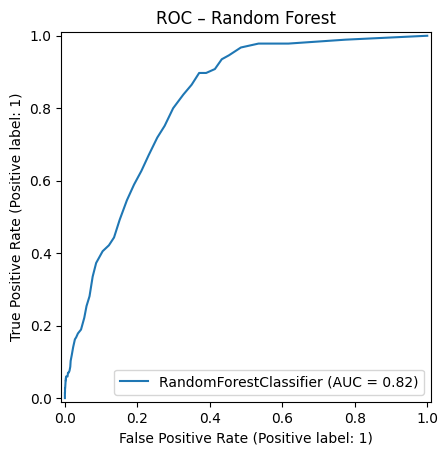

In [ ]:
#utilisation des données undersapled definir le model

rf_under = RandomForestClassifier(n_estimators=100,random_state= seed)

rf_under.fit(X_train_under, y_train_under)

y_pred_rf_under = rf_under.predict(X_test)
y_proba_rf_under = rf_under.predict_proba(X_test)[:, 1]

print("=== Forêt Aléatoire sous echantillonnage ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))
print("\nAUC-ROC :", roc_auc_score(y_test, y_proba_rf))

# Courbe ROC
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC – Random Forest")
plt.show()

**Decision Tree**

In [ ]:
# Avec upsampled data
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
dt.fit(X_train_up, y_train_up)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

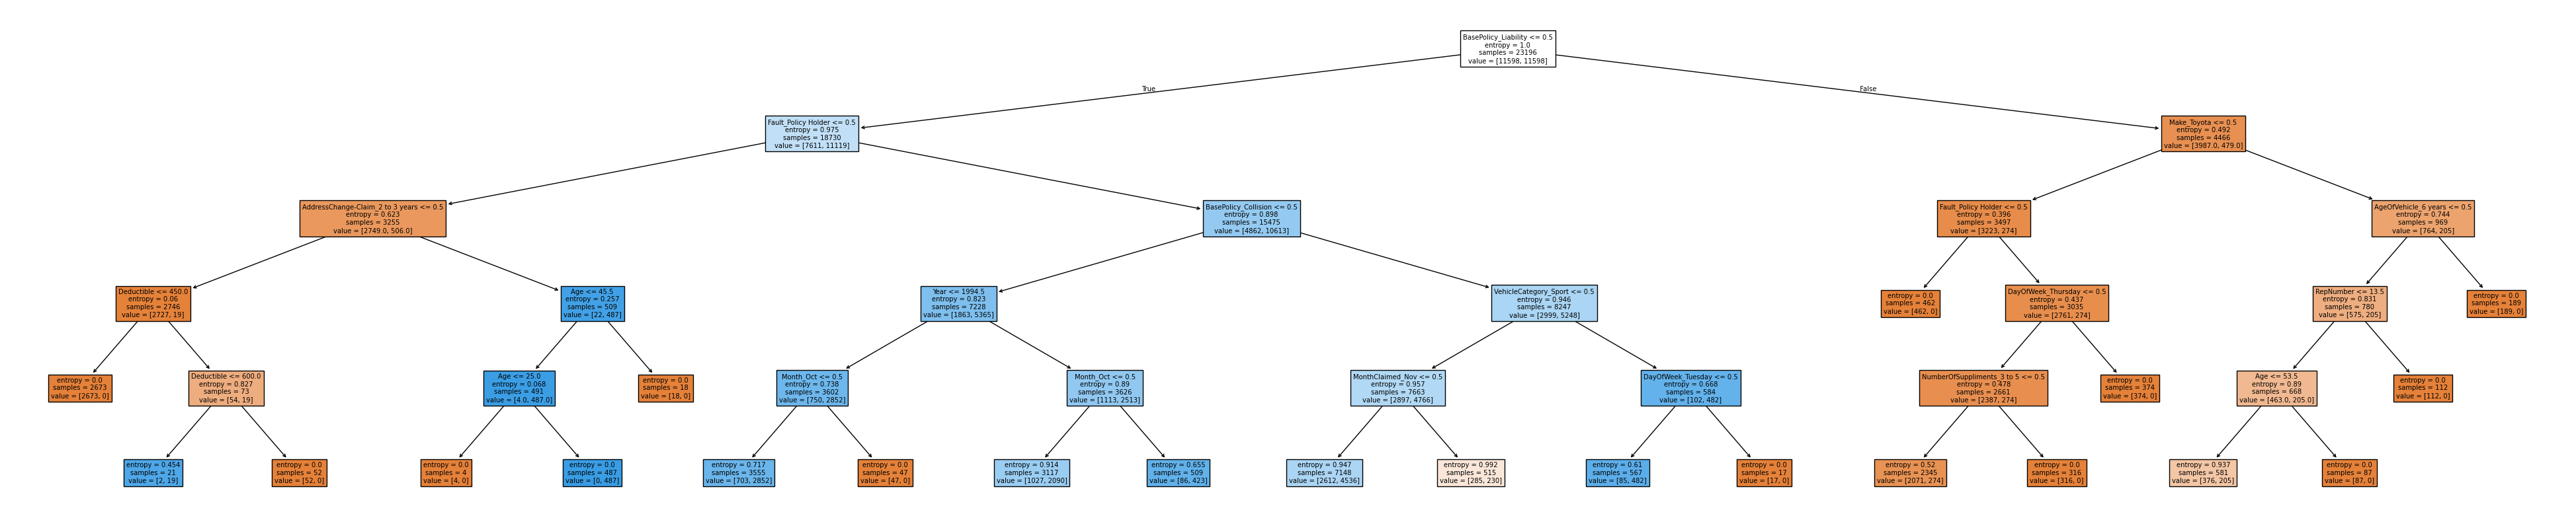

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,10))
plot_tree(dt, feature_names=list(X_train_up.columns), filled=True)
plt.show()

=== Arbre de Décision ===
Accuracy : 0.6212710765239948

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      2899
           1       0.13      0.93      0.23       185

    accuracy                           0.62      3084
   macro avg       0.56      0.77      0.49      3084
weighted avg       0.94      0.62      0.72      3084


Matrice de confusion :
[[1744 1155]
 [  13  172]]

AUC-ROC : 0.8174356488257833


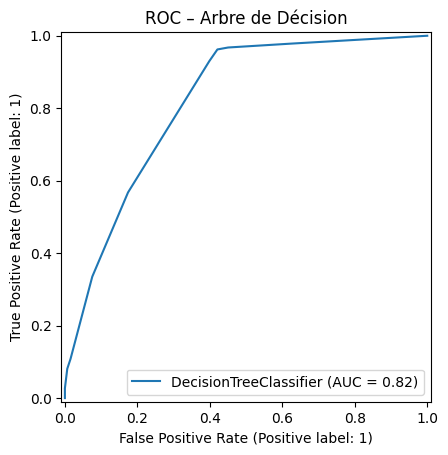

In [ ]:
#Evaluation de performance

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("=== Arbre de Décision ===")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_dt))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt))
print("\nAUC-ROC :", roc_auc_score(y_test, y_proba_dt))

# Courbe ROC
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("ROC – Arbre de Décision")
plt.show()

=== Arbre de Décision de sous échantillonnage ===
Accuracy : 0.6212710765239948

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.60      0.75      2899
           1       0.13      0.93      0.23       185

    accuracy                           0.62      3084
   macro avg       0.56      0.77      0.49      3084
weighted avg       0.94      0.62      0.72      3084


Matrice de confusion :
[[1744 1155]
 [  13  172]]

AUC-ROC : 0.8174356488257833


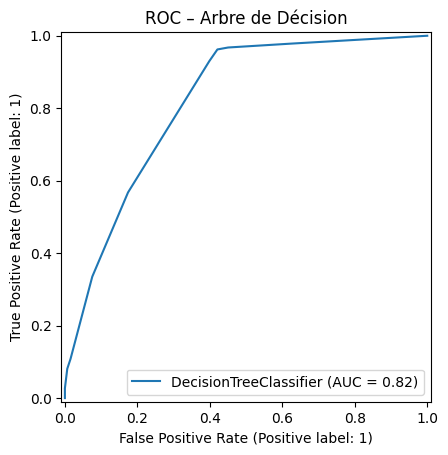

In [ ]:
#Avec undersampled data
dt_under= DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=seed)
dt_under.fit(X_train_under, y_train_under)

#Evaluation
y_pred_dt_under = dt_under.predict(X_test)
y_proba_dt_under = dt_under.predict_proba(X_test)[:, 1]

print("=== Arbre de Décision de sous échantillonnage ===")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_dt))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt))
print("\nAUC-ROC :", roc_auc_score(y_test, y_proba_dt))

# Courbe ROC
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("ROC – Arbre de Décision")
plt.show()

**Regression Logistique**

=== Régression Logistique ===
Accuracy : 0.6348897535667963

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2899
           1       0.13      0.90      0.23       185

    accuracy                           0.63      3084
   macro avg       0.56      0.76      0.49      3084
weighted avg       0.94      0.63      0.73      3084


Matrice de confusion :
[[1791 1108]
 [  18  167]]

AUC-ROC : 0.8073277831125365


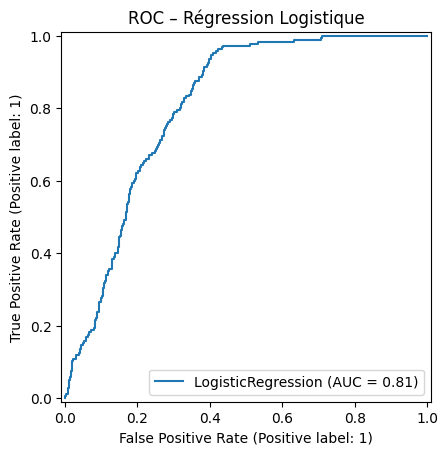

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr= LogisticRegression(random_state=seed, max_iter=500)
lr.fit(X_train_up, y_train_up)

#Evaluation de performance

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("=== Régression Logistique ===")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_lr))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_lr))
print("\nAUC-ROC :", roc_auc_score(y_test, y_proba_lr))

# Courbe ROC
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title("ROC – Régression Logistique")
plt.show()

**XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay



In [ ]:
xgb_up = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=seed
)

xgb_up.fit(X_train_up, y_train_up)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_up.predict(X_test)
y_proba = xgb_up.predict_proba(X_test)[:, 1]

# Rapport complet
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("=== Matrice de Confusion ===")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC : {auc:.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.77      0.87      2899
           1       0.18      0.76      0.29       185

    accuracy                           0.77      3084
   macro avg       0.58      0.77      0.58      3084
weighted avg       0.93      0.77      0.83      3084

=== Matrice de Confusion ===
[[2243  656]
 [  44  141]]
AUC-ROC : 0.8419


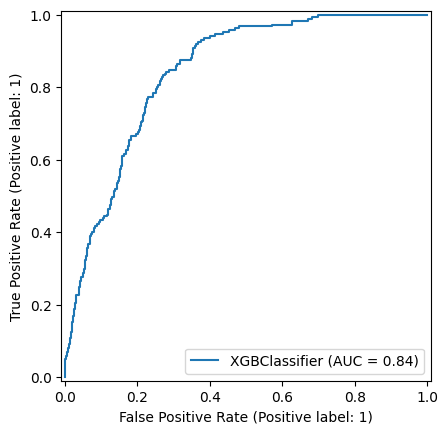

In [ ]:
# Courbe ROC
RocCurveDisplay.from_estimator(xgb_up, X_test, y_test)

### Optimisation des hyperparamètres (GridSearchCV)

#### 1 - Random Forest

In [ ]:
# Pour Foret aléatoire (Random Forest)
from sklearn.model_selection import GridSearchCV

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=seed), params_rf, cv=3, scoring='recall', n_jobs=-1)
grid_rf.fit(X_train_up, y_train_up)

print("Best params:", grid_rf.best_params_)
print("Best recall score:", grid_rf.best_score_)

Best params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best recall score: 1.0


#### 2 - Regression Logistique

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=500, solver='liblinear'),
    param_grid_lr,
    scoring='recall',
    cv=3
)
grid_lr.fit(X_train_up, y_train_up)

print("Logistic Regression - Best Params:", grid_lr.best_params_)
print("Recall:", grid_lr.best_score_)

Logistic Regression - Best Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Recall: 0.9182617692705639


#### 3 - Decision Tree

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='recall',
    cv=3
)
grid_dt.fit(X_train_up, y_train_up)

print("Decision Tree - Best Params:", grid_dt.best_params_)
print("Recall:", grid_dt.best_score_)

Decision Tree - Best Params: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
Recall: 0.9877565097430591


#### 4 - XGBoost

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, len(y_train_up[y_train_up == 0]) / len(y_train_up[y_train_up == 1])]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
grid_xgb.fit(X_train_up, y_train_up)

print("XGBoost - Best Params:", grid_xgb.best_params_)
print("Recall:", grid_xgb.best_score_)

XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}
Recall: 1.0


### Comparaison des modèles

In [ ]:
models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "XGBoost": grid_xgb.best_estimator_
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionnaire pour stocker les résultats
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Modèle": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "F1-score": round(f1_score(y_test, y_pred), 4),
        "AUC-ROC": round(roc_auc_score(y_test, y_proba), 4)
    })

# Afficher sous forme de DataFrame

results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Modèle,Accuracy,Recall,Precision,F1-score,AUC-ROC
0,Logistic Regression,0.6385,0.9189,0.1339,0.2337,0.8060
1,Decision Tree,0.7571,0.5838,0.1385,0.2238,0.7015
2,XGBoost,0.8703,0.4108,0.2071,0.2754,0.8322
3,Random Forest,0.9157,0.2486,0.2754,0.2614,0.8270


Bien que la **Regression Logistique** ait le plus grand recall (92%) ici, nous allons retenir le **XGBoost** comme meilleur modèle car il est plus robuste dans notre contexte et peut faire un meilleur classement global des cas frauduleux vs non-frauduleux avec un **AUC-ROC** plus élévé dans tous les cas.

### Optimisation du XGboost avec selection de variables importantes

In [ ]:
# Récupérons les importances depuis XGBoost

importances = grid_xgb.best_estimator_.feature_importances_

feature_imp = pd.DataFrame({
    "Feature": X_train_up.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# On va considerer les variables importantes > 1%
important_features = feature_imp[feature_imp["Importance"] > 0.01]["Feature"].tolist()
print("Variables sélectionnées :", important_features)

Variables sélectionnées : ['Fault_Policy Holder', 'BasePolicy_Liability', 'AddressChange-Claim_2 to 3 years', 'Days:Policy-Claim_15 to 30', 'MonthClaimed_Nov', 'Year', 'Month_Jan', 'Make_VW', 'Month_Oct', 'Month_Apr', 'MonthClaimed_Oct', 'PoliceReportFiled_No', 'MonthClaimed_Dec']


**Nous allons tenir compte des variables principales importantes avec toutes les catégories pour réentrainer notre modèle Xgboost**

In [10]:
# On va reduire nos données en ne tenant compte que des variables importantes

source_vars = [
    'Fault', 'BasePolicy', 'AddressChange-Claim', 'Month','Days:Policy-Claim', 'MonthClaimed', 'Year', 'NumberOfCars', 'Make', 'PoliceReportFiled'
]

# Garder uniquement les colonnes utiles
df_reduced = df[source_vars + ['FraudFound']].copy()


In [11]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)
X_encoded = encoder.fit_transform(df_reduced[source_vars])
feature_names = encoder.get_feature_names_out(source_vars)

X = pd.DataFrame(X_encoded, columns=feature_names)

y = df_reduced['FraudFound'].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
# Répartition initiale
print("Distribution initiale :")
print(y.value_counts())


Distribution initiale :
FraudFound
0    14497
1      923
Name: count, dtype: int64


In [13]:
# Gestion du déséquilibre de classe avec le Sous-échantillonnage + Sur-échantillonnage

from sklearn.utils import resample

df_balanced = pd.concat([X, y], axis=1)
fraud = df_balanced[df_balanced['FraudFound'] == 1]
non_fraud = df_balanced[df_balanced['FraudFound'] == 0]

fraud_upsampled = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)
df_final = pd.concat([non_fraud, fraud_upsampled])


In [16]:
# Séparation finale
X_final = df_final.drop('FraudFound', axis=1)
y_final = df_final['FraudFound']

print("Distribution finale :")
print(y_final.value_counts())

Distribution finale :
FraudFound
0    14497
1    14497
Name: count, dtype: int64


#### Réentrainement du modèle optimisé avec données reduites

In [20]:
# Division des données de test et d'entrainement
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

#Entraînement XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Évaluation
y_pred = xgb_model.predict(X_test)
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nAUC-ROC : ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      2884
           1       0.81      0.97      0.89      2915

    accuracy                           0.87      5799
   macro avg       0.89      0.87      0.87      5799
weighted avg       0.89      0.87      0.87      5799


Confusion Matrix :
 [[2229  655]
 [  77 2838]]

AUC-ROC :  0.9336823142053038


**Ce modèle est nettement plus amélioré que le précédant avec un recall de 97% pour la classe "fraud" et une meilleur précision**

### Sauvegarde du modèle

In [23]:

# Sauvegarder le modèle XGBoost avec les variables:
import joblib
joblib.dump(xgb_model, 'model_xgboost.pkl')

# Enregistrer le transformeur et les colonnes encodées
joblib.dump(encoder, 'tabular_encoder.pkl')
joblib.dump(feature_names.tolist(), 'tabular_features.pkl')



['tabular_features.pkl']

## ll - Detection de Fraude par Images

#### - Chargement et préparation des données

In [ ]:
# Chargement de données
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/vehicle-insurance-fraud-classification")

print("Path to dataset files:", path)

100%|██████████| 1.41G/1.41G [00:26<00:00, 56.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/vehicle-insurance-fraud-classification/versions/3


In [ ]:
import os

# Afficher les premiers fichiers et dossiers
print("Contenu de la racine :")
print(os.listdir(path))

Contenu de la racine :
['sol', 'test', 'train']


In [ ]:
import os

train_path = os.path.join(path, "train")
test_path = os.path.join(path, "test")


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Créer le générateur de données

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 6463 images belonging to 2 classes.
Found 1616 images belonging to 2 classes.


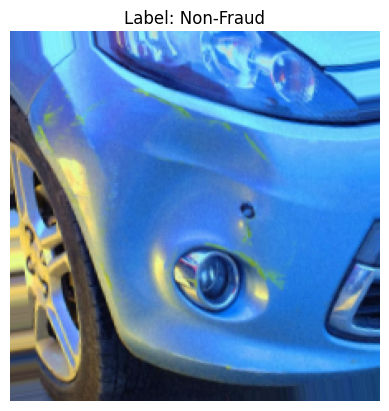

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)
plt.imshow(images[0])
plt.title(f"Label: {'Fraud' if labels[0] == 0 else 'Non-Fraud'}")
plt.axis('off')
plt.show()


### Modélisation des images

### - CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrainement CNN

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


Epoch 1/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 685s 3s/step - accuracy: 0.9447 - loss: 0.2006 - val_accuracy: 0.9431 - val_loss: 0.1837
Epoch 2/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9431 - loss: 0.1781 - val_accuracy: 0.9468 - val_loss: 0.1764
Epoch 3/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 670s 3s/step - accuracy: 0.9440 - loss: 0.1781 - val_accuracy: 0.9449 - val_loss: 0.1715
Epoch 4/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9451 - loss: 0.1742 - val_accuracy: 0.9468 - val_loss: 0.1670
Epoch 5/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.9468 - loss: 0.1695 - val_accuracy: 0.9517 - val_loss: 0.1610


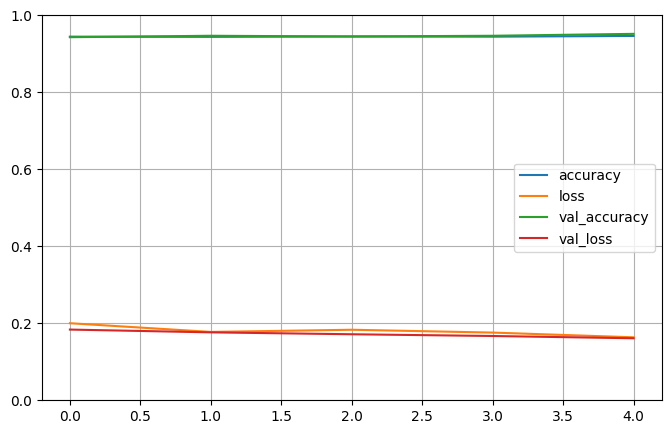

In [ ]:
# Visualisation des performances
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- Verification de la prédiction du CNN

In [ ]:
import numpy as np

# Obtenir les prédictions (probabilités)
y_pred_prob = model.predict(test_generator)

# Convertir en classes (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()


51/51 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step


In [ ]:
# Labels réels
y_true = test_generator.classes
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

              precision    recall  f1-score   support

       Fraud       0.89      0.18      0.30        93
   Non-Fraud       0.95      1.00      0.97      1523

    accuracy                           0.95      1616
   macro avg       0.92      0.59      0.64      1616
weighted avg       0.95      0.95      0.94      1616



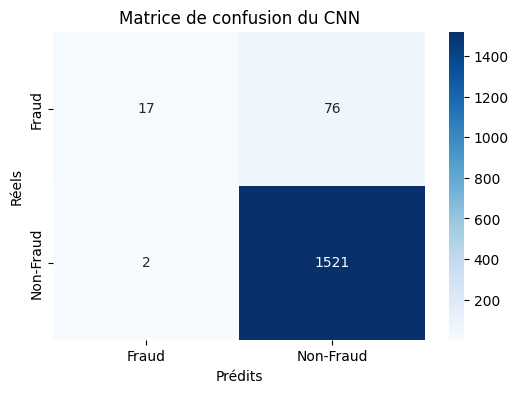

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print(classification_report(y_true, y_pred, target_names=["Fraud", "Non-Fraud"]))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fraud", "Non-Fraud"], yticklabels=["Fraud", "Non-Fraud"])
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion du CNN')
plt.show()


Ce model CNN predit plus de Non-Fraud, et capte les faux négatifs

### - Amélioration du CNN

In [ ]:
# Créons un nouveau générateur avec augmentation pour gérer le déséquilibre

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 6463 images belonging to 2 classes.
Found 1616 images belonging to 2 classes.


In [ ]:
# modelisation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Réentrainement

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_generator,
    validation_data=test_generator,
    epochs=6,
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 710s 3s/step - accuracy: 0.4270 - loss: 2.1843 - val_accuracy: 0.0582 - val_loss: 0.7048
Epoch 2/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 699s 3s/step - accuracy: 0.0650 - loss: 0.7262 - val_accuracy: 0.1782 - val_loss: 0.6741
Epoch 3/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 724s 4s/step - accuracy: 0.1042 - loss: 0.6971 - val_accuracy: 0.0582 - val_loss: 0.7013
Epoch 4/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 740s 4s/step - accuracy: 0.0707 - loss: 0.7330 - val_accuracy: 0.0575 - val_loss: 0.7012
Epoch 5/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 701s 3s/step - accuracy: 0.0600 - loss: 0.7068 - val_accuracy: 0.0575 - val_loss: 0.6994


51/51 ━━━━━━━━━━━━━━━━━━━━ 49s 937ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Fraud       0.06      1.00      0.11        93
   Non-Fraud       0.00      0.00      0.00      1523

    accuracy                           0.06      1616
   macro avg       0.03      0.50      0.05      1616
weighted avg       0.00      0.06      0.01      1616



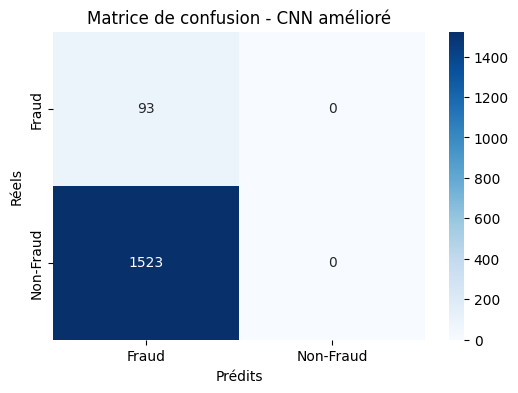

AUC-ROC : 0.5000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Prédictions
y_pred_proba = model_cnn.predict(test_generator)
y_pred = (y_pred_proba > 0.4).astype(int).ravel()

# 2. Vérités terrain
y_true = test_generator.classes

# 3. Rapport de classification
print(classification_report(y_true, y_pred, target_names=["Fraud", "Non-Fraud"]))

# 4. Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fraud", "Non-Fraud"], yticklabels=["Fraud", "Non-Fraud"])
plt.xlabel("Prédits")
plt.ylabel("Réels")
plt.title("Matrice de confusion - CNN amélioré")
plt.show()

# 5. AUC-ROC
auc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC-ROC : {auc:.4f}")



### - ResNet50

In [ ]:
# Importation des librairies

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [ ]:
# Charger la base ResNet50 sans la couche finale

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Ajouter nos propres couches pour la classification binaire

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compilation du modèle

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
 # Entrainement

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=test_generator,
    epochs=7
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 1407s 7s/step - accuracy: 0.8765 - loss: 0.3349 - val_accuracy: 0.9425 - val_loss: 0.2132
Epoch 2/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1383s 7s/step - accuracy: 0.9443 - loss: 0.2288 - val_accuracy: 0.9425 - val_loss: 0.2072
Epoch 3/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1365s 7s/step - accuracy: 0.9429 - loss: 0.2206 - val_accuracy: 0.9425 - val_loss: 0.2043
Epoch 4/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1369s 7s/step - accuracy: 0.9428 - loss: 0.2173 - val_accuracy: 0.9425 - val_loss: 0.2036
Epoch 5/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1366s 7s/step - accuracy: 0.9459 - loss: 0.2086 - val_accuracy: 0.9425 - val_loss: 0.2016
Epoch 6/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1412s 7s/step - accuracy: 0.9430 - loss: 0.2166 - val_accuracy: 0.9425 - val_loss: 0.2000
Epoch 7/7
202/202 ━━━━━━━━━━━━━━━━━━━━ 1364s 7s/step - accuracy: 0.9308 - loss: 0.2504 - val_accuracy: 0.9425 - val_loss: 0.1999


### - Evaluation du model resNet50

In [ ]:
y_pred_proba = model_resnet.predict(test_generator)
y_pred = (y_pred_proba > 0.5).astype(int).ravel()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


50/51 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step


In [ ]:
# Les vraies ethiquêtes
y_true = test_generator.classes


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        93
   Non-Fraud       0.94      1.00      0.97      1523

    accuracy                           0.94      1616
   macro avg       0.47      0.50      0.49      1616
weighted avg       0.89      0.94      0.91      1616



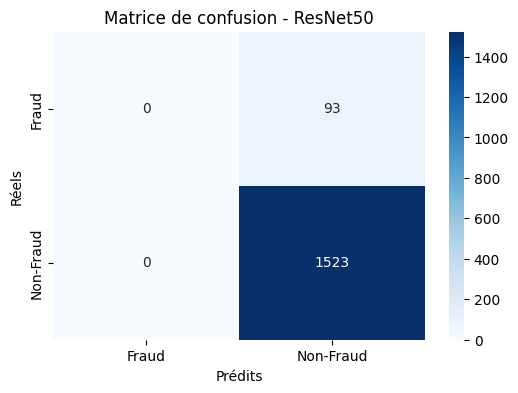

In [ ]:
# Affichage des métriques
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Rapport de classification
print(classification_report(y_true, y_pred, target_names=["Fraud", "Non-Fraud"]))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fraud", "Non-Fraud"], yticklabels=["Fraud", "Non-Fraud"])
plt.xlabel('Prédits')
plt.ylabel('Réels')
plt.title('Matrice de confusion - ResNet50')
plt.show()


Ce model ne detecte aucune fraude à cause du déséquilibre de classe donc ne reconnait que les vehicules non-fraud

### Gestion du déséquilibre des classes pour améliorer le model

- Ajout des poids de classe et réechantillonnage

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# 1. Préparer les chemins
train_path = os.path.join(path, "train")
test_path = os.path.join(path, "test")

# 2. Data Augmentation + rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Générateurs d’images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 4. Calcul des poids de classe
y_train = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Poids des classes :", class_weights)

# 5. Architecture ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = True
# On peut dégeler seulement les derniers blocs :
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)

# 6. Compilation
model_resnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Entraînement avec class_weight
history = model_resnet.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    class_weight=class_weights
)


Found 6463 images belonging to 2 classes.
Found 1616 images belonging to 2 classes.
Poids des classes : {0: np.float64(8.686827956989248), 1: np.float64(0.530536857658841)}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


202/202 ━━━━━━━━━━━━━━━━━━━━ 2714s 13s/step - accuracy: 0.6030 - loss: 0.7104 - val_accuracy: 0.7877 - val_loss: 0.5617
Epoch 2/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 2715s 13s/step - accuracy: 0.7137 - loss: 0.6108 - val_accuracy: 0.7345 - val_loss: 0.6275
Epoch 3/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 2600s 13s/step - accuracy: 0.7751 - loss: 0.6003 - val_accuracy: 0.8626 - val_loss: 0.3580
Epoch 4/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 2617s 13s/step - accuracy: 0.7494 - loss: 0.5875 - val_accuracy: 0.6071 - val_loss: 0.7564
Epoch 5/5
202/202 ━━━━━━━━━━━━━━━━━━━━ 2616s 13s/step - accuracy: 0.7435 - loss: 0.6118 - val_accuracy: 0.4301 - val_loss: 1.0524


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- Verifions la performance de ce model avec les données équilibrées

In [ ]:
y_pred_proba = model_resnet.predict(test_generator)
y_pred = (y_pred_proba > 0.4).astype(int).ravel()
y_true = test_generator.classes


              precision    recall  f1-score   support

       Fraud       0.10      0.87      0.19        93
   Non-Fraud       0.99      0.54      0.70      1523

    accuracy                           0.56      1616
   macro avg       0.54      0.71      0.44      1616
weighted avg       0.93      0.56      0.67      1616



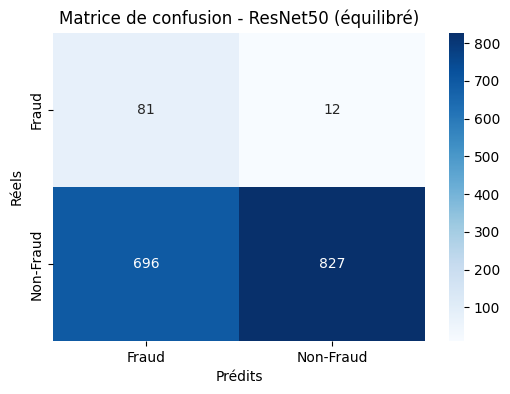

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_true, y_pred, target_names=["Fraud", "Non-Fraud"]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fraud", "Non-Fraud"], yticklabels=["Fraud", "Non-Fraud"])
plt.xlabel("Prédits")
plt.ylabel("Réels")
plt.title("Matrice de confusion - ResNet50 (équilibré)")
plt.show()


-  AUC-ROC

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC-ROC : {auc:.4f}")


**Conclusion modèle image:** Visiblement le **ResNet50** amélioré détecte mieux la fraude que les autres modèles car il a un Accuracy globale : 0.80 et
AUC-ROC : 0.798 ce qui montre une meilleure capacité de discrimination globale.

### - Sauvegarde du ResNet50

In [ ]:
model_resnet.save("/content/resnet50_model.keras")

In [ ]:
print(model_resnet)

<Functional name=functional, built=True>


In [ ]:
import os
os.listdir("/content")

['.config', 'resnet50_model.keras', 'sample_data']